In [3]:
import matplotlib.pyplot as plt
import numpy as np

함수 정의

In [8]:
def draw_chart1(sorted_items, top_n):
    # 누적빈도로 상위 N개에 대한 파레토 그래프 그리기

    # select top factos by frequency
    top_items = sorted_items[:top_n]
    top_factors = [item[0] for item in top_items]
    top_frequencies = [item[1] for item in top_items]

    # draw charts
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.bar(top_factors, top_frequencies, alpha=0.7, color='royalblue')
    ax2.plot(top_factors, top_frequencies, marker='o', color='orangered')
    ax1.set_xlabel('Factors')
    ax1.set_ylabel('Frequency', color='royalblue')
    ax2.set_ylabel('Cumulative Frequency (%)', color='orangered')
    ax2.grid(visible=False)
    ax1.set_xticklabels(top_factors, rotation=45, ha='right')
    plt.title('Pareto Analysis')
    plt.show()

In [9]:
def draw_chart2 (sorted_items, cdf):
    # CDF로 파레토 그래프 그리기

    #draw chart
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.bar(range(len(sorted_items)), [item[1] for item in sorted_items], alpha=0.7, color='royalblue')
    ax2.plot(range(len(sorted_items)), cdf, marker='o', color='orangered')
    ax1.set_xlabel('Factors')
    ax1.set_ylabel('Frequency', color='royalblue')
    ax2.set_ylabel('Cumulative Relative Frequency', color='orangered')
    ax2.grid(visible=False)
    ax1.set_xticks(range(len(sorted_items)))
    ax1.set_xticklabels([item[0] for item in sorted_items], rotation=45, ha='right')
    plt.title('Pareto Analysis')
    plt.show()

In [11]:
def pareto_analysis(data):
    # calculate the frequency of each item in the data
    frequencies = {}
    for item in data:
        frequencies[item] = frequencies.get(item, 0) + 1

    # sort by frequency in descending order
    sorted_items = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
  
    # calculate the relative_frequencies
    total = sum(frequencies.values())
    relative_frequencies = [item[1] / total for item in sorted_items]

    # calculate CDF
    cdf = np.cumsum(relative_frequencies)

    return sorted_items, cdf

In [12]:
# example data
data = ['A', 'B', 'C', 'A', 'D', 'B', 'A', 'A', 'C', 'B', 'A', 'E']

# pareto_analysis 
sorted_items, cdf = pareto_analysis(data)

상위요인 N에 대한 파레토 분석

<ipython-input-8-0193f7512619>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_factors, rotation=45, ha='right')


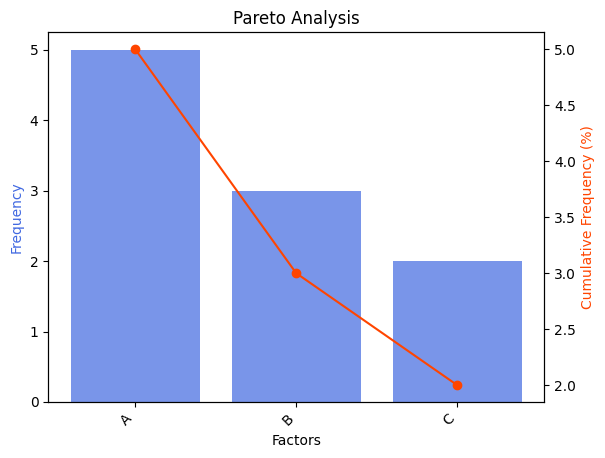

In [13]:
draw_chart1( sorted_items, 3 )

cdf 기반 파레토 분석

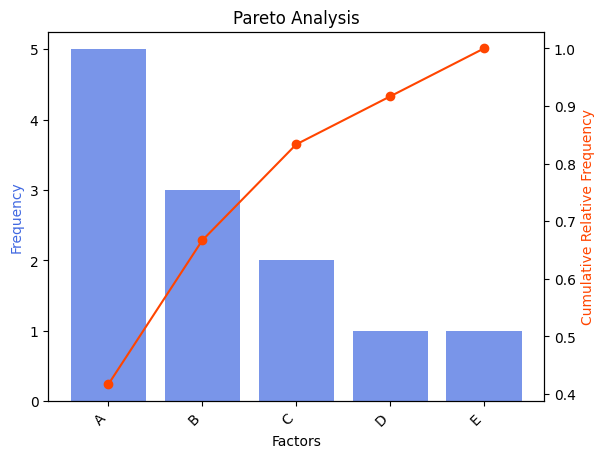

In [14]:
draw_chart2( sorted_items, cdf)

중간값 추정

In [17]:
# estimate the median value
median_index = np.argmax(cdf >= 0.8)
median_value = sorted_items[median_index][0]
print("Estimated median:", median_value)

Estimated median: C
